In [0]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
from glob import glob
import os
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D,Dropout,AveragePooling2D
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [0]:
from google.colab import drive
from google.colab import files

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.listdir('/content/drive/My Drive/Colab Notebooks/TurkishBanknoteDataset')

['test', 'train', 'IMG-20190512-WA0021.jpeg', '20190513_002227.jpg']

In [0]:
train_data_dir='/content/drive/My Drive/Colab Notebooks/TurkishBanknoteDataset/train'

In [0]:
test_data_dir='/content/drive/My Drive/Colab Notebooks/TurkishBanknoteDataset/test'

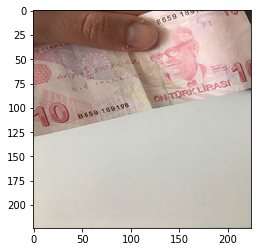

In [0]:
img=load_img('/content/drive/My Drive/Colab Notebooks/TurkishBanknoteDataset/train/10/IMG_1917 resized.jpg')
plt.imshow(img)


In [0]:
data_generator= ImageDataGenerator(preprocessing_function=preprocess_input,
                                             horizontal_flip = True,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2
                                            )


In [0]:
batch_size=6
train_generator = data_generator.flow_from_directory(
       directory = train_data_dir,
       target_size = (224,224),
       batch_size = batch_size,
       class_mode = 'categorical')


Found 721 images belonging to 6 classes.


In [0]:
test_generator = data_generator.flow_from_directory(
       directory = test_data_dir,
       target_size = (224,224),
       batch_size = batch_size,
       class_mode = 'categorical')



Found 180 images belonging to 6 classes.


In [0]:
nb_train=721
num_class=6
from keras import backend as K
K.image_data_format='channels_last'

In [0]:
model = Sequential()
model.add(ResNet50(include_top=False, weights='imagenet', pooling='avg'))
model.layers[0].trainable=True
model.add(Dense(num_class, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:

model.fit_generator(
       train_generator, # Train data ile eğitimi başlatır.
       epochs = 12,
       steps_per_epoch=nb_train / batch_size
                                              ) 



NameError: ignored

In [0]:
score = model.evaluate_generator(test_generator)
print('Accuracy = %',int(100*score[1]))

Accuracy = % 98


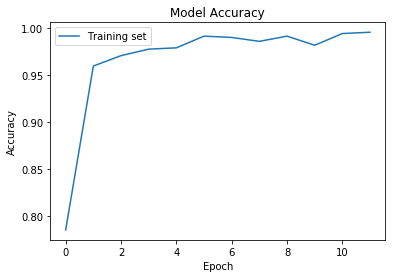

In [0]:
# Accuracy 
plt.plot(model.history.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set'], loc='upper left')
plt.show()

In [0]:
sayac=0
images=list()
for i in glob('/content/drive/My Drive/Colab Notebooks/TurkishBanknoteDataset/test/5/*'):
  sayac+=1
  img=load_img(i)
  images.append(img_to_array(img))
  if(sayac==10):
    break

 

In [0]:
#10 Adet 5 liranın sınıf tahmini
for i in images:
  img = preprocess_input(np.expand_dims(i.copy(), axis=0))
  pred=model.predict(img)
  print(model.predict_classes(img),'Tahmin oranı =%',int(max(pred[0])*100))

[4] Tahmin oranı =% 99
[4] Tahmin oranı =% 99
[4] Tahmin oranı =% 99
[4] Tahmin oranı =% 99
[4] Tahmin oranı =% 99
[4] Tahmin oranı =% 99
[4] Tahmin oranı =% 99
[4] Tahmin oranı =% 99
[4] Tahmin oranı =% 99
[4] Tahmin oranı =% 99


5 TL
[4]
Tahmin oranı =% 96


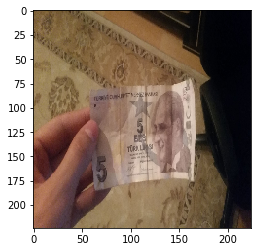

In [0]:
#Fotoğrafı yeni çekilmiş 5 liranın sınıf tahmini
img=load_img('/content/drive/My Drive/Colab Notebooks/TurkishBanknoteDataset/IMG-20190512-WA0021.jpeg',target_size=(224,224))
plt.imshow(img)
img=img_to_array(img)
img = preprocess_input(np.expand_dims(img.copy(), axis=0))
predict_class=model.predict_classes(img)
if (predict_class [0]==4):
  print('5 TL')
pred=model.predict(img)
print(model.predict_classes(img))
print('Tahmin oranı =%',int(max(pred[0])*100))

5 TL
[4]
Tahmin oranı =% 85


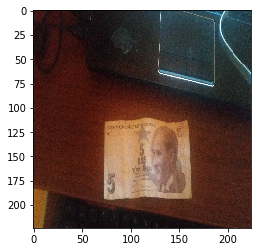

In [0]:
#Fotoğrafı yeni çekilmiş 5 liranın sınıf tahmini
img=load_img('/content/drive/My Drive/Colab Notebooks/TurkishBanknoteDataset/20190513_002227.jpg',target_size=(224,224))
plt.imshow(img)
img=img_to_array(img)
img = preprocess_input(np.expand_dims(img.copy(), axis=0))
predict_class=model.predict_classes(img)
if (predict_class [0]==4):
  print('5 TL')
pred=model.predict(img)
print(model.predict_classes(img))
print('Tahmin oranı =%',int(max(pred[0])*100))

In [0]:
sayac=0
images=list()
for i in glob('/content/drive/My Drive/Colab Notebooks/TurkishBanknoteDataset/test/10/*'):
  sayac+=1
  img=load_img(i)
  images.append(img_to_array(img))
  if(sayac==10):
    break

In [0]:
#10 Adet 10 liranın sınıf tahmini
for i in images:
  img = preprocess_input(np.expand_dims(i.copy(), axis=0))
  pred=model.predict(img)
  print(model.predict_classes(img),'Tahmin oranı =%',int(max(pred[0])*100))

[0] Tahmin oranı =% 99
[0] Tahmin oranı =% 99
[0] Tahmin oranı =% 99
[0] Tahmin oranı =% 99
[0] Tahmin oranı =% 99
[0] Tahmin oranı =% 99
[0] Tahmin oranı =% 99
[0] Tahmin oranı =% 100
[0] Tahmin oranı =% 100
[0] Tahmin oranı =% 99


10 TL
[0]
Tahmin oranı =% 99


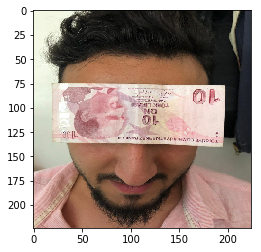

In [0]:
#Fotoğrafı yeni çekilmiş 10 liranın sınıf tahmini
img=load_img('/content/drive/My Drive/Colab Notebooks/TurkishBanknoteDataset/IMG-20190515-WA0002.jpg',target_size=(224,224))
plt.imshow(img)
img=img_to_array(img)
img = preprocess_input(np.expand_dims(img.copy(), axis=0))
predict_class=model.predict_classes(img)
if (predict_class [0]==0):
  print('10 TL')
pred=model.predict(img)
print(model.predict_classes(img))
print('Tahmin oranı =%',int(max(pred[0])*100))

In [0]:
sayac=0
images=list()
for i in glob('/content/drive/My Drive/Colab Notebooks/TurkishBanknoteDataset/test/50/*'):
  sayac+=1
  img=load_img(i)
  images.append(img_to_array(img))
  if(sayac==10):
    break

In [0]:
#10 Adet 50 liranın sınıf tahmini
for i in images:
  img = preprocess_input(np.expand_dims(i.copy(), axis=0))
  pred=model.predict(img)
  print(model.predict_classes(img),'Tahmin oranı =%',int(max(pred[0])*100))

[5] Tahmin oranı =% 99
[5] Tahmin oranı =% 99
[5] Tahmin oranı =% 99
[5] Tahmin oranı =% 99
[5] Tahmin oranı =% 99
[5] Tahmin oranı =% 99
[5] Tahmin oranı =% 99
[5] Tahmin oranı =% 100
[5] Tahmin oranı =% 99
[5] Tahmin oranı =% 99


50 TL
[5]
Tahmin oranı =% 65


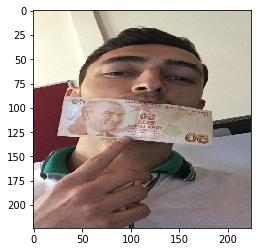

In [0]:
#Fotoğrafı yeni çekilmiş 50 liranın sınıf tahmini
img=load_img('/content/drive/My Drive/Colab Notebooks/TurkishBanknoteDataset/IMG-20190515-WA0003.jpg',target_size=(224,224))
plt.imshow(img)
img=img_to_array(img)
img = preprocess_input(np.expand_dims(img.copy(), axis=0))
predict_class=model.predict_classes(img)
if (predict_class [0]==5):
  print('50 TL')
pred=model.predict(img)
print(model.predict_classes(img))
print('Tahmin oranı =%',int(max(pred[0])*100))